In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Boston Housing

In [2]:
boston = pd.read_csv('../Cases/Boston Housing/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = boston.drop('medv', axis=1)
y = boston['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [5]:
lr.intercept_, lr.coef_

(30.24675099392349,
 array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]))

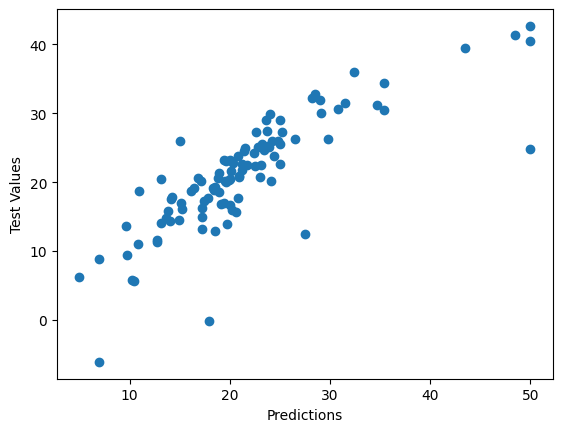

In [6]:
plt.scatter(y_test, y_pred)
plt.xlabel('Predictions')
plt.ylabel('Test Values')
plt.show()

In [7]:
mean_squared_error(y_pred=y_pred, y_true=y_test), r2_score(y_pred=y_pred, y_true=y_test)

(24.291119474973538, 0.6687594935356317)

In [8]:
y_bar = np.mean(y_test)
tss = np.sum((y_test - y_bar) ** 2)
rss = np.sum((y_test - y_pred) ** 2)
r2 = 1 - rss / tss
r2

0.6687594935356317

## Medical Cost Personal

In [9]:
insurance = pd.read_csv('../Cases/Medical Cost Personal/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
X = insurance[['age', 'bmi', 'children']]
y = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(mean_squared_error(y_pred=y_pred, y_true=y_test), r2_score(y_pred=y_pred, y_true=y_test))

131201335.64669806 0.15489592484270753


In [ ]:
""" Dùng get_dummies để chuyển đổi các biến phân loại thành biến giả
Ví dụ: Giới tính (Female, Male), Hút thuốc (Yes, No), ...
"""
X = insurance.drop('charges', axis=1)
X = pd.get_dummies(X)